In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import matplotlib.pyplot as plt
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/TRAIN.csv')
df=df[["distance","surge_multiplier","cab_provider","cab_type","fare"]]
df

,distance,surge_multiplier,cab_provider,cab_type,fare
0,3.03,1.0,Lyft,Lux Black XL,34.0
1,1.30,1.0,Uber,Black,18.5
2,2.71,1.0,Uber,UberX,19.5
3,2.43,1.0,Lyft,Lyft,10.5
4,2.71,1.0,Uber,UberXL,32.0
...,...,...,...,...,...
99995,1.16,1.0,Uber,UberXL,12.0
99996,1.16,1.0,Uber,Black SUV,26.0
99997,1.16,1.0,Uber,Black,16.0
99998,1.16,1.0,Uber,UberX,7.0


In [ ]:
#df['time_stamp'] = df.time_stamp.apply(lambda x: pd.to_datetime(x,unit='ms'))
#df["hour"]=df.time_stamp.apply(lambda x: pd.Timestamp(x).hour)
#df=df[["distance","surge_multiplier","hour","cab_provider","cab_type","fare"]]
#df

In [ ]:
#np.unique(df['cab_type'])
df["cab_provider"].replace(["Lyft","Uber"],[0,1],inplace=True)
df["cab_type"].replace(['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft','Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

In [ ]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [ ]:
regressor = RandomForestRegressor(n_estimators = 1500, random_state = 1,max_features=3,bootstrap=True,oob_score=True,min_weight_fraction_leaf=0.0015)
#regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0015,
                      n_estimators=1500, n_jobs=None, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
df1=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/TEST.csv')
df1=df1[["distance","surge_multiplier","cab_provider","cab_type"]]
df1["cab_provider"].replace(["Lyft","Uber"],[0,1],inplace=True)
df1["cab_type"].replace(['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft','Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

#df1['time_stamp'] = df1.time_stamp.apply(lambda x: pd.to_datetime(x,unit='ms'))
#df1["hour"]=df1.time_stamp.apply(lambda x: pd.Timestamp(x).hour)
#df1=df1[["distance","surge_multiplier","hour","cab_provider","cab_type"]]
#df1

In [ ]:
x_test = df1.iloc[:, 0:4].values
x_test

array([[ 0.59,  1.  ,  0.  ,  3.  ],
       [ 0.59,  1.  ,  0.  ,  5.  ],
       [ 6.83,  1.  ,  1.  , 10.  ],
       ...,
       [ 3.05,  1.  ,  1.  ,  2.  ],
       [ 2.96,  1.  ,  0.  ,  8.  ],
       [ 2.96,  1.  ,  0.  ,  3.  ]])

In [ ]:
pred = regressor.predict(x_test)

In [ ]:
print(pred[0:12])
a=np.array([11,26,18.5,11.5,9,10.5,7,7,26,5,32.5,19.5])

[10.98104277 26.95270023 15.49975677 13.10575291 10.0105868  10.21404263
  5.29734278  6.98604626 28.0542772   5.63752012 34.5475779  20.74912343]


In [ ]:
index=[i for i in range(25000)]

df = pd.DataFrame({"index" : index, "fare" : pred})
df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/submission1.csv", index=False)

In [ ]:
np.unique(df1["cab_type"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
#Neural net

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from tensorflow.keras import backend as K
from kerastuner.tuners import RandomSearch

In [3]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 2.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=b771d8dd85fa93d03ca98e8d197280cc985bd70c7515d5f872ec682f52ad6a82
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=436c15fa21c20122a863c60bedab3cc063ed3419b7865b90fb200b93bf6af17a
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [5]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/TRAIN.csv')
df=df[["distance","surge_multiplier","cab_provider","cab_type","fare"]]
#np.unique(df['cab_type'])
df["cab_provider"].replace(["Lyft","Uber"],[0,1],inplace=True)
df["cab_type"].replace(['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft','Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [6]:
x[:,0].shape

(100000,)

In [7]:
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(x[:,1])
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#one = onehot_encoder.fit_transform(integer_encoded)
#print(one.shape)
div=np.max(x[:,1])
x[:,1]=x[:,1]/div
x

array([[ 3.03      ,  0.33333333,  0.        ,  5.        ],
       [ 1.3       ,  0.33333333,  1.        ,  1.        ],
       [ 2.71      ,  0.33333333,  1.        , 10.        ],
       ...,
       [ 1.16      ,  0.33333333,  1.        ,  1.        ],
       [ 1.16      ,  0.33333333,  1.        , 10.        ],
       [ 1.23      ,  0.33333333,  1.        , 10.        ]])

In [8]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(x[:,2])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
two = onehot_encoder.fit_transform(integer_encoded)
print(two.shape)

(100000, 2)


In [9]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(x[:,3])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
three = onehot_encoder.fit_transform(integer_encoded)
print(three.shape)

(100000, 12)


In [10]:
x=np.concatenate((x[:,0].reshape(100000,1),x[:,1].reshape(100000,1),two,three),axis=1)
x.shape

(100000, 16)

In [11]:
div=np.max(x[:,0])
x[:,0]=x[:,0]/div
x

array([[0.404     , 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17333333, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36133333, 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.15466667, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15466667, 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.164     , 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [12]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [13]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(24, kernel_initializer=tf.keras.initializers.HeNormal(),input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(6, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(17, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(27, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(27, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(13, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(8, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(14, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(13, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(26, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(14, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(14, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(28, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(24, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(16, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(14, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(6, kernel_initializer=tf.keras.initializers.HeNormal(),activation='relu'))
NN_model.add(BatchNormalization())
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer=tf.keras.initializers.HeNormal(),activation='linear'))

# Compile the network :
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
NN_model.compile(loss=root_mean_squared_error, optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
NN_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
_________________________________________________________________
batch_normalization (BatchNo (None, 6)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 17)                119       
_________________________________________________________________
batch_normalization_1 (Batch (None, 17)                68        
_________________________________________________________________
dense_3 (Dense)              (None, 27)                486       
_________________________________________________________________
batch_normalization_2 (Batch (None, 27)                1

In [14]:
checkpoint_name = '/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/weights/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


In [15]:
NN_model1=NN_model.fit(x, y, epochs=100, batch_size=32, validation_split = 0.3, callbacks=callbacks_list)


Epoch 1/100
2188/2188 [==============================] - 19s 7ms/step - loss: 7.6766 - root_mean_squared_error: 9.4134 - val_loss: 2.4353 - val_root_mean_squared_error: 2.6008

Epoch 00001: val_loss improved from inf to 2.43527, saving model to /content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/weights/Weights-001--2.43527.hdf5
Epoch 2/100
2188/2188 [==============================] - 14s 6ms/step - loss: 3.1779 - root_mean_squared_error: 3.3301 - val_loss: 2.4967 - val_root_mean_squared_error: 2.5958

Epoch 00002: val_loss did not improve from 2.43527
Epoch 3/100
2188/2188 [==============================] - 14s 6ms/step - loss: 2.9780 - root_mean_squared_error: 3.1355 - val_loss: 1.9645 - val_root_mean_squared_error: 2.0858

Epoch 00003: val_loss improved from 2.43527 to 1.96446, saving model to /content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/weights/Weights-003--1.96446.hdf5
Epoch 4/100
2188/2188 [=========================

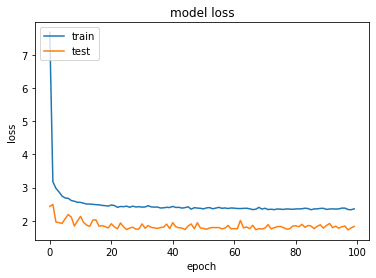

In [16]:
plt.plot(NN_model1.history['loss'])
plt.plot(NN_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
wights_file = '/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/weights/Weights-098--1.72701.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [18]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/TEST.csv')
df=df[["distance","surge_multiplier","cab_provider","cab_type"]]
#np.unique(df['cab_type'])
df["cab_provider"].replace(["Lyft","Uber"],[0,1],inplace=True)
df["cab_type"].replace(['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft','Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
x_test = df.iloc[:, 0:4].values
div=np.max(x_test[:,0])
x_test[:,0]=x_test[:,0]/div
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(x_test[:,1])
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#one = onehot_encoder.fit_transform(integer_encoded)
#print(one.shape)
div=np.max(x_test[:,1])
x_test[:,1]=x_test[:,1]/div

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(x_test[:,2])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
two = onehot_encoder.fit_transform(integer_encoded)
#print(two.shape)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(x_test[:,3])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
three = onehot_encoder.fit_transform(integer_encoded)
#print(three.shape)
x_test=np.concatenate((x_test[:,0].reshape(25000,1),x_test[:,1].reshape(25000,1),two,three),axis=1)
x_test

array([[0.07742782, 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07742782, 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.89632546, 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.40026247, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38845144, 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38845144, 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
predictions = NN_model.predict(x_test)

In [20]:
predictions=predictions.reshape(25000)

In [21]:
predictions[0:13]

array([11.236354 , 27.105553 , 15.788712 , 13.229697 ,  9.827417 ,
        9.597673 ,  5.2861104,  7.2189364, 27.919163 ,  5.648359 ,
       34.379505 , 20.025707 , 15.835963 ], dtype=float32)

In [22]:
index=[i for i in range(25000)]

df = pd.DataFrame({"index" : index, "fare" : predictions})
df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/submission1.csv", index=False)

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/TRAIN.csv')

In [ ]:
a=df[(df["source"]=="Boston University") & (df["destination"]=="Theatre District") & (df["cab_provider"]=="Lyft") & (df["cab_type"]=="Shared") & (df["distance"]==2.91)]
#print(pd.to_datetime(a['time_stamp'], unit='ms').dt.hour)
a

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
3789,3789,1543223290029,Lyft,Boston University,Theatre District,2.91,1.0,Shared,11.0
10381,10381,1543238410189,Lyft,Boston University,Theatre District,2.91,1.0,Shared,7.0
31514,31514,1543279334404,Lyft,Boston University,Theatre District,2.91,1.0,Shared,7.0
61748,61748,1543316421937,Lyft,Boston University,Theatre District,2.91,1.0,Shared,7.0
68763,68763,1543325064393,Lyft,Boston University,Theatre District,2.91,1.0,Shared,7.0


In [ ]:
x=a.iloc[3]['time_stamp']
print(pd.to_datetime(x,unit='ms'))
x=a.iloc[4]['time_stamp']
print(pd.to_datetime(x,unit='ms'))
print(x_test[6])

2018-11-27 11:00:21.937000
2018-11-27 13:24:24.393000
[1.55 1.   0.   8.  ]


In [ ]:
!pip3 install xgboost

In [ ]:
!python setup.py install --use-cuda --use-nccl # Install the XGBoost to your current Python environment.
!python setup.py build    # Build the Python package.
!python setup.py build_ext # Build only the C++ core.
!python setup.py sdist     # Create a source distribution
!python setup.py bdist     # Create a binary distribution
!python setup.py bdist_wheel # Create a binary distribution with wheel format

python3: can't open file 'setup.py': [Errno 2] No such file or directory
python3: can't open file 'setup.py': [Errno 2] No such file or directory
python3: can't open file 'setup.py': [Errno 2] No such file or directory
python3: can't open file 'setup.py': [Errno 2] No such file or directory
python3: can't open file 'setup.py': [Errno 2] No such file or directory
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(n_estimators=5000,learning_rate=0.27,importance_type='gain',objective='reg:squarederror')

In [ ]:
model.fit(x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.27, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=5000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred[0:12]

array([10.79021  , 26.853662 , 17.607172 , 13.154479 ,  9.8503275,
        8.355899 ,  5.14441  ,  7.017725 , 27.827204 ,  5.7207055,
       33.800793 , 20.54173  ], dtype=float32)

In [ ]:
a=np.array([11,26,18.5,11.5,9,10.5,7,7,26,5,32.5,19.5])

In [ ]:
mean_squared_error(a,pred[0:12],squared=False)
#best-1.0915 learningrate=0.27

1.281480380107056

In [ ]:
x[5]

array([ 2.19,  1.  ,  1.  , 10.  ])

In [ ]:
index=[i for i in range(25000)]

df = pd.DataFrame({"index" : index, "fare" : pred})
df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/submission1.csv", index=False)

In [ ]:
  #All time best--1.75133  learningrate=0.2,nestimators=1000

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=1,min_samples_leaf=3,min_impurity_decrease=0.002889,max_features=3)
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.002889, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
pred=regressor.predict(x_test)
pred

array([11.00301205, 26.77012248, 15.38246269, ..., 33.65543735,
        7.1675    , 20.07637795])

In [ ]:
a

array([11. , 26. , 18.5, 11.5,  9. , 10.5,  7. ,  7. , 26. ,  5. , 32.5,
       19.5])

In [ ]:
pred[0:12]

array([11.00301205, 26.77012248, 15.38246269, 13.50610583,  8.6361828 ,
       10.0372807 ,  5.42586207,  8.6361828 , 27.58658923,  9.73079438,
       33.99333333, 21.25074331])

In [ ]:
#Rough

In [ ]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=5,
                                            max_value=30,
                                            step=1),
                               activation='relu',
                               kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(Dense(1, kernel_initializer=tf.keras.initializers.HeNormal(),activation='linear'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-1, 1e-3, 0.005, 0.7, 0.85, 1.5, 1.7])),
        loss=root_mean_squared_error,
        metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


In [ ]:
#tuner = kt.Hyperband(model_builder,
#                     objective='val_loss',
#                     max_epochs=10,
#                     factor=3,
#                     directory='/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/Tuning/',
#                     project_name='cab price')
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=2,
    directory='/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/Tuning/',
    project_name='cabprice')

In [ ]:

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 30, 'step': 1, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 30, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.1, 0.001, 0.005, 0.7, 0.85, 1.5, 1.7], 'ordered': True}


In [ ]:

tuner.search(x, y,
             epochs=25,
             validation_split=0.2)

Trial 5 Complete [00h 04m 02s]
val_loss: 9.311394214630127

Best val_loss So Far: 1.7315409183502197
Total elapsed time: 00h 19m 55s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in /content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/Tuning/cabprice
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 24
units_1: 6
learning_rate: 0.001
units_2: 17
units_3: 27
units_4: 27
units_5: 13
units_6: 8
units_7: 14
units_8: 13
units_9: 26
units_10: 14
units_11: 14
units_12: 28
units_13: 24
units_14: 16
units_15: 14
units_16: 6
Score: 1.7315409183502197
Trial summary
Hyperparameters:
num_layers: 17
units_0: 18
units_1: 6
learning_rate: 0.1
units_2: 5
units_3: 5
units_4: 5
units_5: 5
units_6: 5
units_7: 5
units_8: 5
units_9: 5
units_10: 5
units_11: 5
units_12: 5
units_13: 5
units_14: 5
units_15: 5
units_16: 5
Score: 9.311380863189697
Trial summary
Hyperparameters:
num_layers: 11
units_0: 19
units_1: 27
learning_rate: 1.7
units_2: 22
units_3: 27
units_4: 19
units_5: 24
units_6: 10
units_7: 9
units_8: 16
units_9: 13
units_10: 9
units_11: 16
units_12: 30
un

In [ ]:
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss]:", eval_result)

In [ ]:
#new

In [ ]:
from kerastuner import HyperModel


class MyHyperModel(HyperModel):

    def __init__(self, num_classes):
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units',
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(Dense(1, kernel_initializer=tf.keras.initializers.HeNormal(),activation='linear'))
        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9])),loss=root_mean_squared_error,metrics=[tf.keras.metrics.RootMeanSquaredError()])
        return model


hypermodel = MyHyperModel(num_classes=10)

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    directory='/content/gdrive/MyDrive/Colab Notebooks/cab_fare_prediction_ai_challenge-dataset/Tuning/',
    project_name='cabbooking')

tuner.search(x, y,
             epochs=5,
             validation_split=0.3)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
units             |128               |?                 
learning_rate     |0.01              |?                 

Epoch 1/5
2187/2188 [============================>.] - ETA: 0s - loss: 3.2640 - root_mean_squared_error: 4.1409

KeyboardInterrupt: ignored

In [ ]:
models = tuner.get_best_models(num_models=2)

NameError: ignored

In [ ]:
models

NameError: ignored